# 3D Simple Pendulum Simulation

This Python code simulates the motion of a 3D simple pendulum using the `odeint` function from the `scipy.integrate` module. The pendulum is modeled using the equations of motion for the spherical coordinates and is set up to oscillate about the vertical axis.

The simulation is displayed as an animation using the `FuncAnimation` function from the `matplotlib.animation` module. The animation shows the pendulum bob swinging back and forth, with its motion traced out by a tail. The rope connecting the pendulum bob to its support is also visible in the animation.

The simulation can be customized by adjusting the parameters at the top of the code, such as the length of the pendulum and the initial conditions. The animation can be further improved by changing the colors, markers, and line widths of the pendulum, rope, and tail.

The above code is a Python script that enables interactive plotting using the `%matplotlib notebook` magic command. 

In [17]:
# Enable interactive plot
%matplotlib notebook

It then imports the necessary libraries for numerical integration, 3D visualization, and animation of a dynamical system.

- `numpy` is imported for scientific computing and array manipulation.
- `scipy.integrate` is imported for numerical integration of ordinary differential equations using the `odeint` function.
- `matplotlib.pyplot` is imported for 2D plotting of the results.
- `mpl_toolkits.mplot3d` is imported for 3D plotting of the results.
- `matplotlib.animation` is imported for the creation of animations.

The script is intended for use in a Jupyter notebook environment to create interactive 3D visualizations and animations of dynamical systems described by ordinary differential equations.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

## Simple Pendulum Equations in 3D

In this code, we define a function `pendulum_equations_3D` to compute the derivatives for the spherical coordinates of a 3D simple pendulum. The function takes in a list `y` of four values: `theta` is the angle of the pendulum from the vertical, `omega_theta` is the angular velocity of the pendulum in the theta direction, `phi` is the angle of the pendulum in the xy-plane, and `omega_phi` is the angular velocity of the pendulum in the phi direction. The function also takes in the gravitational constant `g` and the length of the pendulum `l`.

We can derive the equations of motion for the 3D simple pendulum using Lagrangian mechanics. The Lagrangian for a 3D pendulum is given by

$$
\mathcal{L} = \frac{1}{2} m \left( l^2 \dot{\theta}^2 + l^2 \sin^2 \theta \dot{\phi}^2 \right) - m g l \cos \theta,
$$

where $m$ is the mass of the pendulum and $\dot{\theta}$ and $\dot{\phi}$ are the time derivatives of $\theta$ and $\phi$, respectively.

Using the Euler-Lagrange equations, we can derive the equations of motion for the 3D pendulum:

$$
\begin{align*}
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\theta}} - \frac{\partial \mathcal{L}}{\partial \theta} &= 0 \\
\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\phi}} - \frac{\partial \mathcal{L}}{\partial \phi} &= 0
\end{align*}
$$

Solving for these equations gives us the four equations used in the `pendulum_equations_3D` function:

$$
\begin{align*}
\frac{d\theta}{dt} &= \omega_{\theta} \\
\frac{d\omega_{\theta}}{dt} &= -\frac{g}{l} \sin \theta - \frac{\omega_{\phi}^2}{l} \sin \theta \cos \theta \\
\frac{d\phi}{dt} &= \omega_{\phi} \\
\frac{d\omega_{\phi}}{dt} &= \frac{2}{\sin \theta} \omega_{\theta} \omega_{\phi} \cos \theta
\end{align*}
$$

The first equation is simply the definition of angular velocity. The second equation gives the rate of change of angular velocity in the $\theta$ direction and depends on the gravitational constant, the length of the pendulum, and the current angle and angular velocity in both the $\theta$ and $\phi$ directions. The third equation is again the definition of angular velocity. The fourth equation gives the rate of change of angular velocity in the $\phi$ direction and depends on the current angle and angular velocity in both the $\theta$ and $\phi$ directions.

In summary, the `pendulum_equations_3D` function takes in the current state of a 3D simple pendulum and computes the derivatives of the state variables using the equations of motion derived from the Lagrangian of the system.


In [2]:
def pendulum_equations_3D(y, t, g, l):
    """Compute the derivatives for the spherical coordinates of the 3D simple pendulum.
    
    Args:
        y (list): A list of [theta, omega_theta, phi, omega_phi] values.
        t (float): The time at which to compute the derivatives.
        g (float): The gravitational constant.
        l (float): The length of the pendulum.

    Returns:
        dydt (list): A list of the computed derivatives.
    """
    theta, omega_theta, phi, omega_phi = y
    dydt = [
        omega_theta,
        -(g/l) * np.sin(theta) - (omega_phi**2) * np.sin(theta) * np.cos(theta),
        omega_phi,
        2 * omega_theta * omega_phi * np.cos(theta) / np.sin(theta)
    ]
    return dydt

## Conversion of Spherical to Cartesian Coordinates

In this code, we define a function `cart_coords` that converts spherical coordinates `(theta, phi, l)` to Cartesian coordinates `(x, y, z)`. The Cartesian coordinate system is a 3D coordinate system, where each point in space is represented by an ordered triple of numbers. The spherical coordinate system is an alternative coordinate system that is often used in physics and mathematics. It describes points in space in terms of their distance from a fixed point (the origin), the angle between the positive x-axis and the line connecting the point to the origin (the azimuthal angle), and the angle between the positive z-axis and the line connecting the point to the origin (the polar angle).

The conversion from spherical to Cartesian coordinates is given by:

$$ x = l \sin(\theta) \cos(\phi) $$

$$ y = l \sin(\theta) \sin(\phi) $$

$$ z = -l \cos(\theta) $$

where `theta` is the polar angle, `phi` is the azimuthal angle, and `l` is the length of the pendulum.

The `cart_coords` function takes as input the values of `theta`, `phi`, and `l`, and returns the Cartesian coordinates `x`, `y`, and `z`. The function is implemented using the NumPy library, which provides functions for computing trigonometric functions and other mathematical operations efficiently.

In [3]:
def cart_coords(theta, phi, l):
    """Convert the spherical coordinates to Cartesian coordinates.
    
    Args:
        theta (float): The polar angle.
        phi (float): The azimuthal angle.
        l (float): The length of the pendulum.

    Returns:
        x, y, z (float): The Cartesian coordinates.
    """
    x = l * np.sin(theta) * np.cos(phi)
    y = l * np.sin(theta) * np.sin(phi)
    z = -l * np.cos(theta)
    return x, y, z

## Solving the 3D Simple Pendulum ODE

We can solve these equations numerically using the `odeint` function from the `scipy.integrate` module. The function `solve_pendulum_ode` takes as input the initial conditions for $\theta$, $\dot{\theta}$, $\phi$, and $\dot{\phi}$, the time vector, $t$, the gravitational constant, $g$, and the length of the rod, $l$, and returns the solution array, `sol`, which contains the values of $\theta$, $\dot{\theta}$, $\phi$, and $\dot{\phi}$ at each time step.


In [4]:
def solve_pendulum_ode(y0, t, g, l):
    """Solve the differential equations for the 3D simple pendulum.
    
    Args:
        y0 (list): The initial conditions [theta, omega_theta, phi, omega_phi].
        t (numpy array): The time vector.
        g (float): The gravitational constant.
        l (float): The length of the pendulum.

    Returns:
        sol (numpy array): The solution array of the pendulum's motion.
    """
    sol = odeint(pendulum_equations_3D, y0, t, args=(g, l))
    return sol

## Representation

In [32]:
def setup_3d_plot(l):
    """Set up the 3D plot for the pendulum simulation.
    
    Args:
        l (float): The length of the pendulum.

    Returns:
        fig (matplotlib.figure.Figure): The figure object.
        ax (matplotlib.axes._subplots.Axes3DSubplot): The 3D axes object.
    """
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-l, l])
    ax.set_ylim([-l, l])
    ax.set_zlim([-l, 0])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Simple Pendulum Simulation')
    ax.grid(True)  # Add grid
    return fig, ax

### Parameters

In [33]:
# Parameters
g = 9.81
l = 1.0
y0 = [np.pi/4, 0.0, np.pi/2, np.pi/2]

# Time vector
t = np.linspace(0, 10, 1000)

# Solve the differential equations
sol = solve_pendulum_ode(y0, t, g, l)

# Convert the spherical coordinates to Cartesian coordinates
x, y, z = cart_coords(sol[:, 0], sol[:, 2], l)

### Plot

<IPython.core.display.Javascript object>


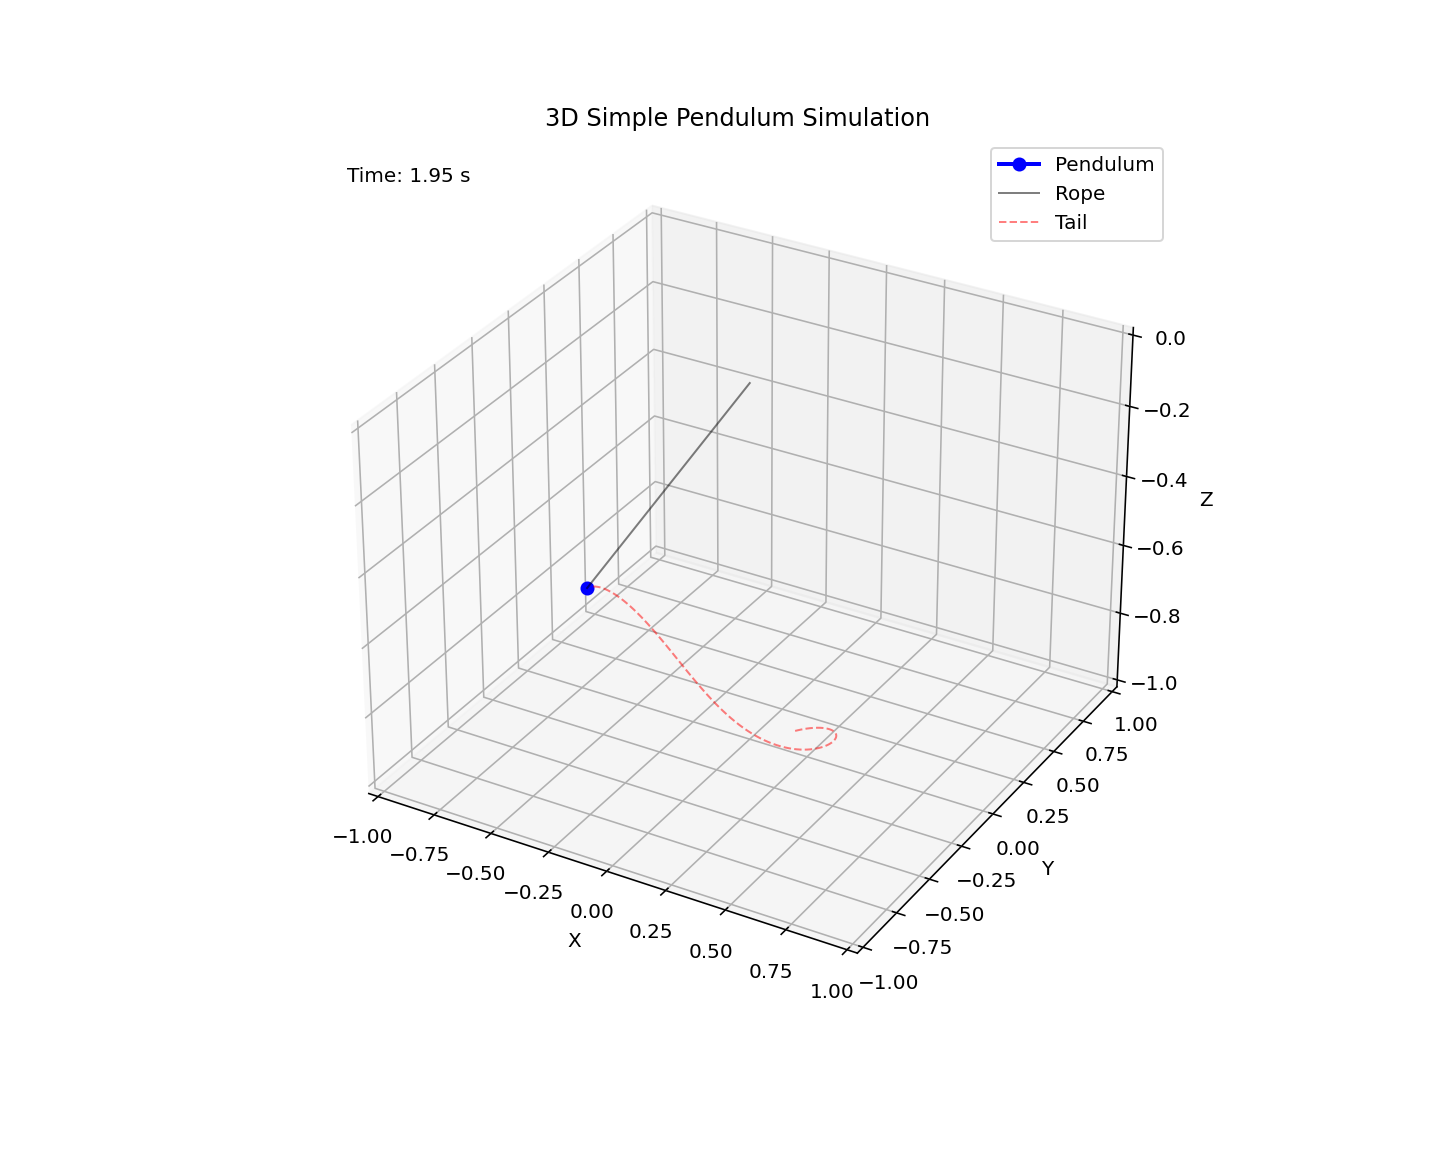

In [34]:
# Set up the 3D plot
fig, ax = setup_3d_plot(l)

# Improve plot aesthetics
color_pendulum = 'blue'
color_rope = 'black'
color_tail = 'red'
marker_pendulum = 'o'
marker_rope = '-'
marker_tail = '--'
linewidth_pendulum = 2
linewidth_rope = 1
linewidth_tail = 1

# Initialize the animation plot
pendulum, = ax.plot([], [], [], 
                    marker_pendulum + marker_rope, lw=linewidth_pendulum, 
                    color=color_pendulum, label='Pendulum')
rope, = ax.plot([], [], [], 
                marker_rope, lw=linewidth_rope, 
                color=color_rope, alpha=0.5, label='Rope')
tail, = ax.plot([], [], [],
                marker_tail, lw=linewidth_tail, 
                color=color_tail, alpha=0.5, label='Tail')    # Add a tail for the pendulum animation
time_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes) # Add a text object for displaying time

# Animation update function
def update(frame):
    """Update the pendulum animation for the current frame.
    
    Args:
        frame (int): The current frame number.

    Returns:
        pendulum, rope, tail (tuple): A tuple of the updated Line3D objects.
    """
    # Pendulum
    pendulum.set_data(x[frame], y[frame])
    pendulum.set_3d_properties(z[frame])

    # Rope
    rope.set_data(np.array([0, x[frame]]), np.array([0, y[frame]]))
    rope.set_3d_properties(np.array([0, z[frame]]))

    # Tail
    long_tail = 100
    if frame > 0 and frame < long_tail:
        tail.set_data(x[:frame-1], y[:frame-1])  # Update the tail
        tail.set_3d_properties(z[:frame-1])

    else:
        tail.set_data(x[frame-long_tail:frame-1], y[frame-long_tail:frame-1])  # Update the tail
        tail.set_3d_properties(z[frame-long_tail:frame-1])

    # Display time on the plot
    time_text.set_text('Time: {:.2f} s'.format(t[frame]))

    return pendulum, rope, tail, time_text,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(t), interval=1, blit=True)
# Add a legend
ax.legend()

# Show the animation
# Display the animation in Jupyter notebook
plt.show()